In [49]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import pearsonr, linregress, norm
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

### Data Cleaning

In [2]:
# import csv and clean emissions_df
emissions_df = pd.read_csv('Resources/co2_emissions_kt_by_country.csv')
emissions_df = emissions_df[['country_name', 'year', 'value']]
emissions_df.columns = ['Country', 'Year', 'CO2_Emissions']
emissions_df

,Country,Year,CO2_Emissions
0,Aruba,1960,11092.675000
1,Aruba,1961,11576.719000
2,Aruba,1962,12713.489000
3,Aruba,1963,12178.107000
4,Aruba,1964,11840.743000
...,...,...,...
13948,Zimbabwe,2015,12430.000305
13949,Zimbabwe,2016,11020.000458
13950,Zimbabwe,2017,10340.000153
13951,Zimbabwe,2018,12380.000114


In [3]:
# Count occurrences of each country
country_counts = emissions_df['Country'].value_counts()
country_counts

Country
St. Lucia                    60
Haiti                        60
Lao PDR                      60
Lebanon                      60
Liberia                      60
                             ..
West Bank and Gaza           27
Turks and Caicos Islands     27
Kosovo                        9
Curacao                       5
Sint Maarten (Dutch part)     3
Name: count, Length: 256, dtype: int64

In [4]:
# import csv and clean pesticide_df
pesticide_df = pd.read_csv('Resources/pesticide-use-tonnes.csv')
pesticide_df = pesticide_df[['Entity', 'Year', 'Pesticides (total) | 00001357 || Agricultural Use | 005157 || Tonnes']]
pesticide_df.columns = ['Country', 'Year', 'Pesticides_Used']
pesticide_df['Country'] = pesticide_df['Country'].str.replace(r"\s*\(.*\)", "", regex=True).str.strip()
pesticide_df.head()

,Country,Year,Pesticides_Used
0,Africa,1990,73958.66
1,Africa,1991,69956.26
2,Africa,1992,60260.71
3,Africa,1993,54301.62
4,Africa,1994,58819.04


In [5]:
# Count occurrences of each country
country_counts = pesticide_df['Country'].value_counts()
country_counts

Country
China                 64
Africa                32
Oceania               32
New Caledonia         32
New Zealand           32
                      ..
Sint Maarten          11
Belgium-Luxembourg    10
Czechoslovakia         3
USSR                   2
Yugoslavia             2
Name: count, Length: 248, dtype: int64

In [6]:
# import csv and clean population_df
population_df = pd.read_csv('Resources/population.csv')
population_df = population_df[['Entity', 'Year', 'Population (historical)']]
population_df.columns = ['Country', 'Year', 'Population']
population_df.head()

,Country,Year,Population
0,Afghanistan,-10000,14737
1,Afghanistan,-9000,20405
2,Afghanistan,-8000,28253
3,Afghanistan,-7000,39120
4,Afghanistan,-6000,54166


In [7]:
# Count occurrences of each country
country_counts = population_df['Country'].value_counts()
country_counts

Country
European Union (27)              265
Asia                             265
High-income countries            265
North America                    265
Lower-middle-income countries    265
                                ... 
Yemen Arab Republic               23
Yemen People's Republic           23
East Germany                       8
West Germany                       8
Akrotiri and Dhekelia              3
Name: count, Length: 271, dtype: int64

In [8]:
# import and clean cc_impact_on_ag_df
cc_impact_on_ag_df = pd.read_csv('Resources/climate_change_impact_on_agriculture_2024.csv')
cc_impact_on_ag_df = cc_impact_on_ag_df[['Year', 'Country', 'Crop_Yield_MT_per_HA', 'Pesticide_Use_KG_per_HA']]
cc_impact_grouped = cc_impact_on_ag_df.groupby(['Country', 'Year']).mean().reset_index()
cc_impact_grouped.columns = ['Country', 'Year', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']
cc_impact_grouped['Country'] = cc_impact_grouped['Country'].replace('USA', 'United States')
cc_impact_grouped

,Country,Year,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,2.400480,26.308400
1,Argentina,1991,2.089216,28.136486
2,Argentina,1992,2.192125,29.538750
3,Argentina,1993,2.147947,25.887368
4,Argentina,1994,1.815600,23.214000
...,...,...,...,...
345,United States,2020,1.940484,29.495806
346,United States,2021,2.378774,23.778710
347,United States,2022,2.356036,21.257143
348,United States,2023,2.132185,24.895185


In [9]:
# Count occurrences of each country
country_counts = cc_impact_grouped['Country'].value_counts()
country_counts

Country
Argentina        35
Australia        35
Brazil           35
Canada           35
China            35
France           35
India            35
Nigeria          35
Russia           35
United States    35
Name: count, dtype: int64

In [10]:
# check data types of dfs
print(f"\n emissions_df : ")
emissions_df.info()

print(f"\n pesticide_df: ")
pesticide_df.info()

print(f"\n population_df: ")
population_df.info()

print(f"\n cc_impact_grouped: ")
cc_impact_grouped.info()


 emissions_df : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13953 entries, 0 to 13952
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        13953 non-null  object 
 1   Year           13953 non-null  int64  
 2   CO2_Emissions  13953 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 327.1+ KB

 pesticide_df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7705 entries, 0 to 7704
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          7705 non-null   object 
 1   Year             7705 non-null   int64  
 2   Pesticides_Used  7705 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 180.7+ KB

 population_df: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59177 entries, 0 to 59176
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  --

### Merge Data

In [11]:
# Merge dfs
merged_df = pd.merge(emissions_df, pesticide_df, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, population_df, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df, cc_impact_grouped, on=['Country', 'Year'], how='inner')
merged_df

,Country,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,1.003200e+05,26156.00,32755907,2.400480,26.308400
1,Argentina,1991,1.059200e+05,26156.00,33230292,2.089216,28.136486
2,Argentina,1992,1.079300e+05,26156.00,33693532,2.192125,29.538750
3,Argentina,1993,1.102600e+05,26156.00,34152718,2.147947,25.887368
4,Argentina,1994,1.119100e+05,30195.00,34613491,1.815600,23.214000
...,...,...,...,...,...,...,...
295,United States,2015,4.990710e+06,423474.94,326126498,2.395477,25.690227
296,United States,2016,4.894500e+06,451666.84,329179421,2.374840,25.404800
297,United States,2017,4.819370e+06,449713.06,332204656,2.320947,26.632105
298,United States,2018,4.975310e+06,457385.40,335056495,2.219276,25.174138


In [12]:
merged_cols = merged_df.columns.tolist()
merged_cols

['Country',
 'Year',
 'CO2_Emissions',
 'Pesticides_Used',
 'Population',
 'Mean_Crop_Yield_MT_per_HA',
 'Mean_Pesticide_Use_KG_per_HA']

In [13]:
# Count occurrences of each country
country_counts = merged_df['Country'].value_counts()
country_counts

Country
China            60
Argentina        30
Australia        30
Brazil           30
Canada           30
France           30
India            30
Nigeria          30
United States    30
Name: count, dtype: int64

In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       300 non-null    object 
 1   Year                          300 non-null    int64  
 2   CO2_Emissions                 300 non-null    float64
 3   Pesticides_Used               300 non-null    float64
 4   Population                    300 non-null    int64  
 5   Mean_Crop_Yield_MT_per_HA     300 non-null    float64
 6   Mean_Pesticide_Use_KG_per_HA  300 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 16.5+ KB


In [15]:
merged_cols = merged_df.columns.tolist()
merged_cols

['Country',
 'Year',
 'CO2_Emissions',
 'Pesticides_Used',
 'Population',
 'Mean_Crop_Yield_MT_per_HA',
 'Mean_Pesticide_Use_KG_per_HA']

### Stats tables

In [16]:
# check stats - db
stats_df = merged_df.describe()
stats_df = stats_df.drop('Year', axis=1)
stats_df

,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
count,3.000000e+02,300.000000,3.000000e+02,300.000000,300.000000
mean,2.045196e+06,158456.694733,4.520887e+08,2.242349,25.120597
std,2.837997e+06,145480.657376,5.331886e+08,0.199722,2.750419
min,7.277000e+04,948.790000,1.712630e+07,1.735667,18.301818
25%,2.980375e+05,41100.872500,3.911657e+07,2.113888,23.231000
50%,4.475650e+05,84468.540000,1.702696e+08,2.243346,25.103804
75%,3.134110e+06,261162.915000,1.140389e+09,2.375224,26.975265
max,1.070722e+07,620538.000000,1.423520e+09,2.860440,34.142000


In [17]:
grouped_by_country = merged_df.groupby('Country').mean().reset_index()
grouped_by_country = grouped_by_country.sort_values(by='Mean_Crop_Yield_MT_per_HA', ascending=False).reset_index()
grouped_by_country = grouped_by_country.drop('Year', axis=1)
grouped_by_country

,index,Country,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,0,Argentina,1.458107e+05,128620.465000,3.901567e+07,2.280418,25.535570
1,4,China,6.024094e+06,267517.249333,1.302796e+09,2.260184,25.518564
2,7,Nigeria,9.503667e+04,17146.180667,1.471147e+08,2.256496,25.548871
3,8,United States,5.277263e+06,413953.557000,2.951897e+08,2.248684,24.514380
4,3,Canada,5.145500e+05,51157.989000,3.248737e+07,2.241143,25.162890
5,6,India,1.329424e+06,50406.761000,1.137862e+09,2.240355,25.321821
6,1,Australia,3.473983e+05,38176.646000,2.070121e+07,2.230198,24.847792
7,2,Brazil,3.428450e+05,268065.933333,1.815550e+08,2.206510,24.761054
8,5,France,3.514423e+05,82004.916667,6.136918e+07,2.199313,24.476462


## Box plots

In [18]:
def plot_box(df, categorical_var, numerical_var):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categorical_var, y=numerical_var, data=df)
    plt.title(f'Box Plot of {numerical_var} by {categorical_var}')
    plt.xlabel(categorical_var)
    plt.ylabel(numerical_var)
    plt.xticks(rotation=45)
    plt.show()

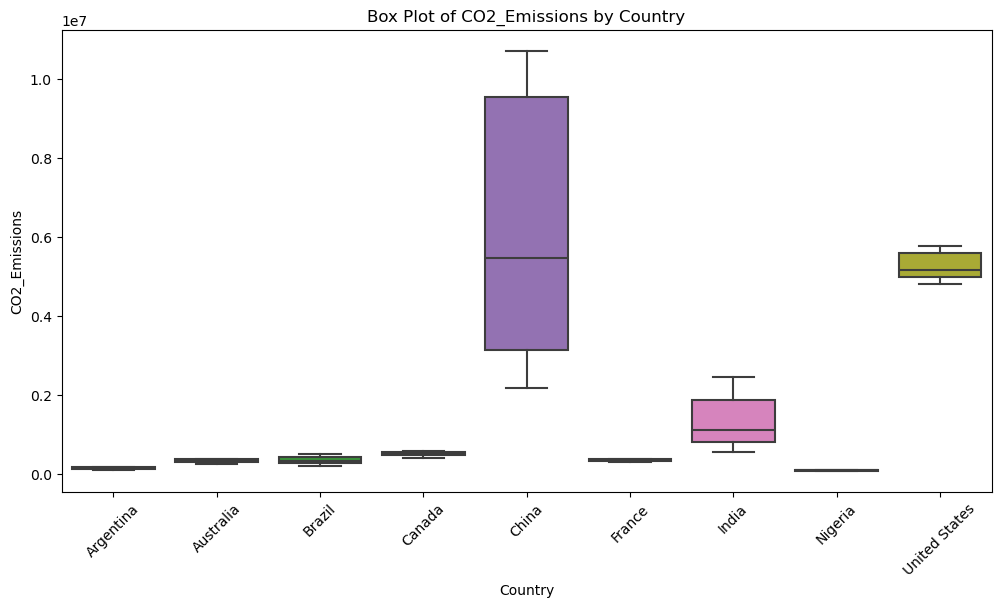

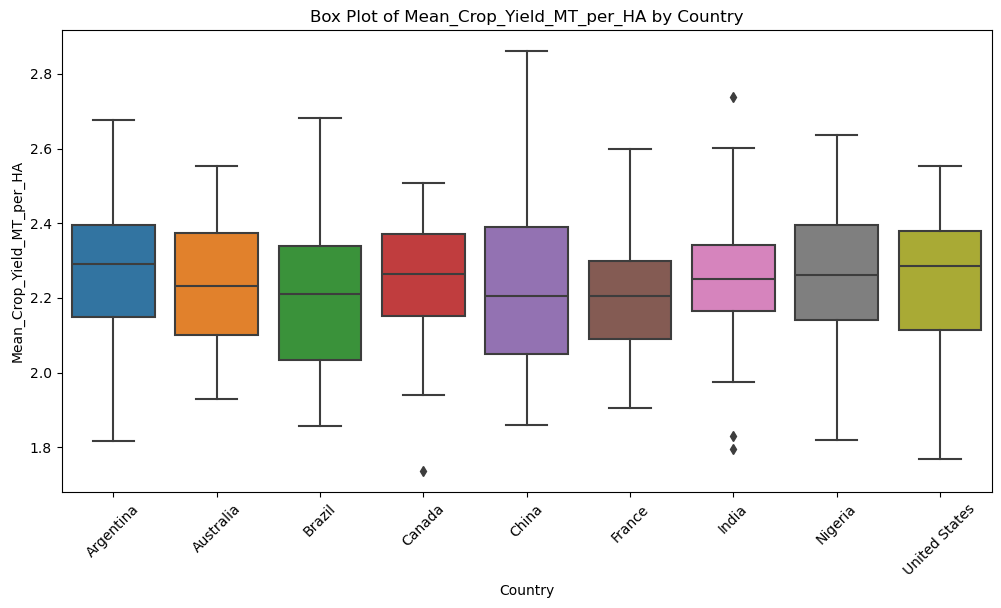

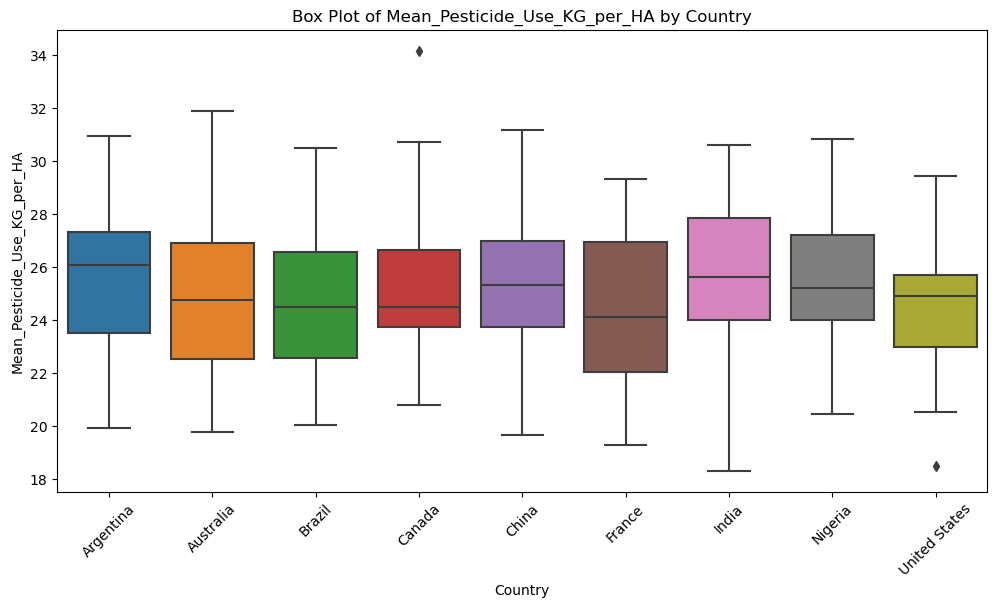

In [19]:
# List of numerical variables to iterate over
numerical_vars = ['CO2_Emissions', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA'] 

# Loop through each numerical variable and call the function
for num_var in numerical_vars:
    plot_box(merged_df, 'Country', num_var)

## Pie Charts

In [20]:
def plot_pie_chart(df, categorical_var, numerical_var, title):

    # Group by the categorical variable and sum the numerical variable
    grouped_data = df.groupby(categorical_var)[numerical_var].sum()

    plt.figure(figsize=(6, 6))  # Set figure size
    plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=0, shadow=True)
    
    plt.title(title)  # Set title
    plt.axis('equal')  # Set axis to 'equal' for a circular pie chart
    plt.show()


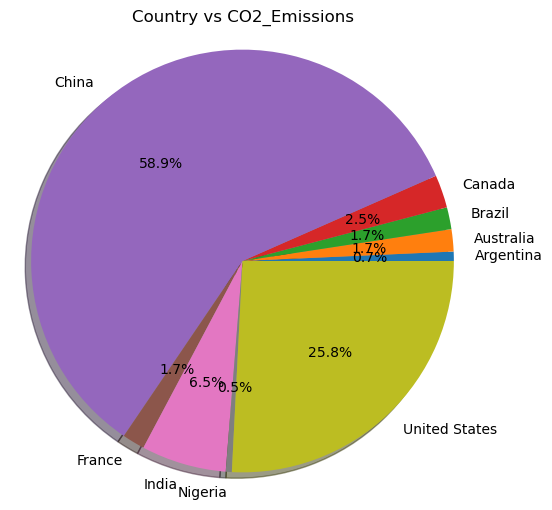

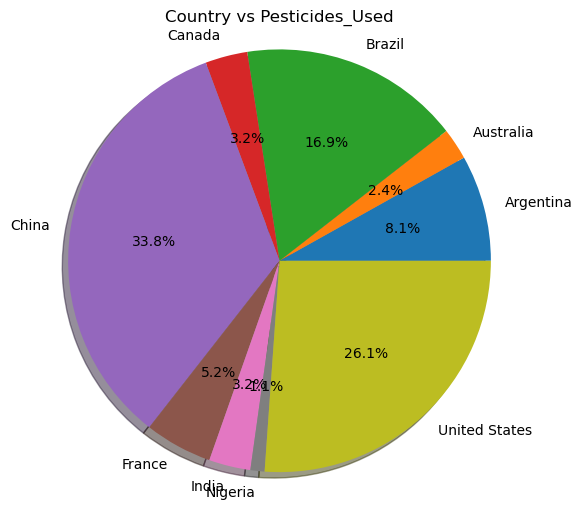

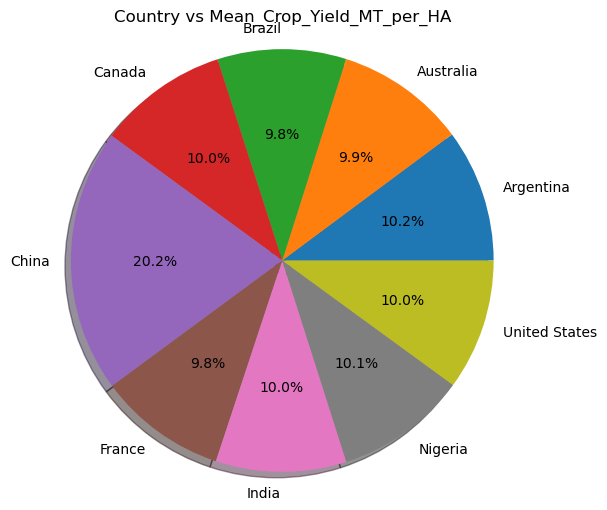

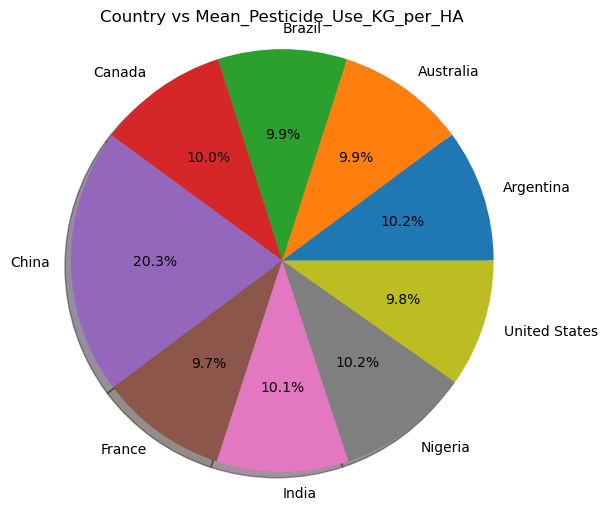

In [21]:
vars = ['CO2_Emissions', 'Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']

for var in vars:
    plot_pie_chart(merged_df, 'Country', var, f"Country vs {var}")

## Bar charts

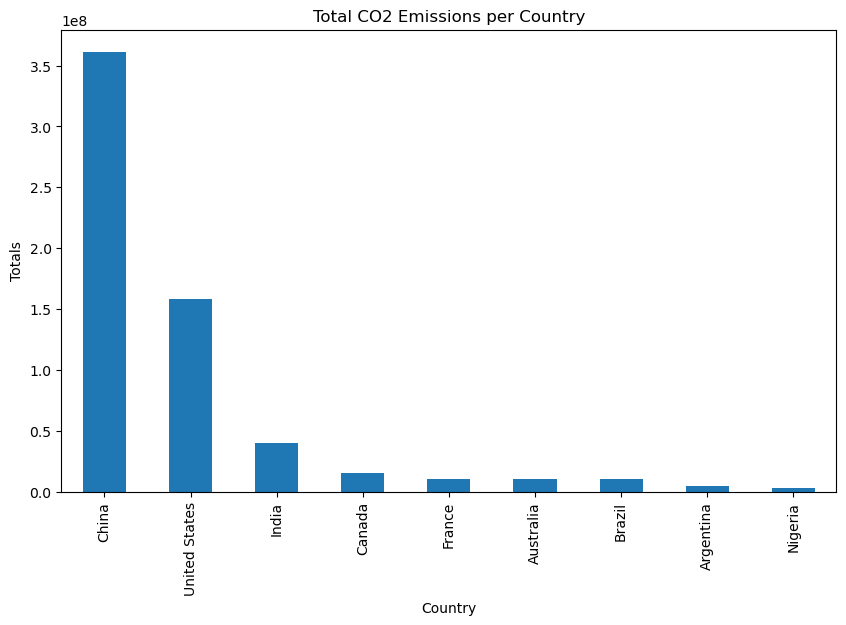

In [22]:
# bar chart
grouped_data = merged_df.groupby('Country')['CO2_Emissions'].sum()
grouped_data = grouped_data.sort_values(ascending=False)

grouped_data.plot(kind='bar', figsize=(10,6))
plt.title('Total CO2 Emissions per Country')
plt.ylabel('Totals')
plt.show()

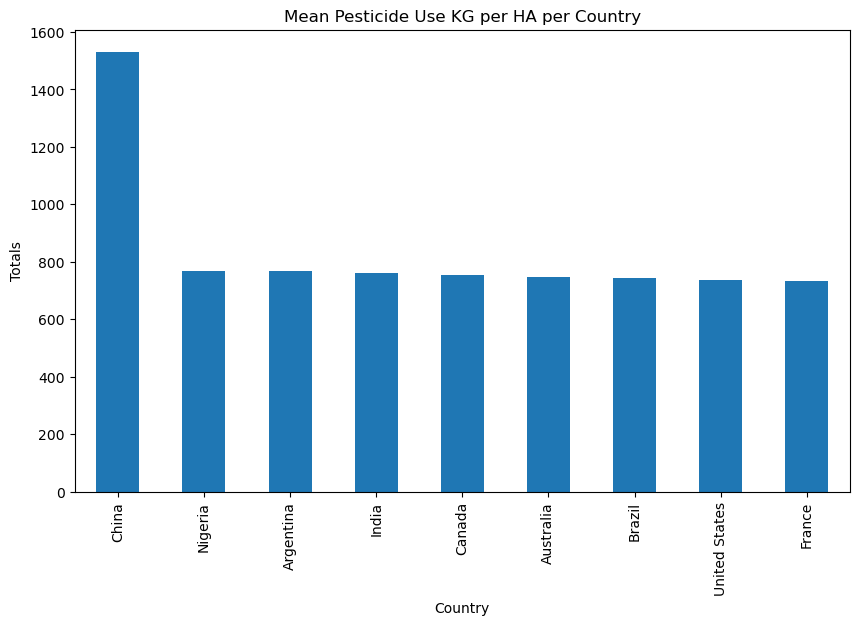

In [23]:
# bar chart
grouped_data = merged_df.groupby('Country')['Mean_Pesticide_Use_KG_per_HA'].sum()
grouped_data = grouped_data.sort_values(ascending=False)

grouped_data.plot(kind='bar', figsize=(10,6))
plt.title('Mean Pesticide Use KG per HA per Country')
plt.ylabel('Totals')
plt.show()

## Linear Regressions

In [24]:
# function for linear regression and pearsons r - with groupby aggregation
def plot_correlation(df, x_label, y_label, agg_func):
    
    # Group the DataFrame by 'Year' and apply the aggregation function
    if agg_func == 'mean':
        grouped_df = df.groupby('Year')[[x_label, y_label]].mean().dropna()
    elif agg_func == 'sum':
        grouped_df = df.groupby('Year')[[x_label, y_label]].sum().dropna()
    else:
        raise ValueError("agg_func must be either 'mean' or 'sum'")

    # Get x and y data (grouped by Year)
    x = grouped_df[x_label]
    y = grouped_df[y_label]

    # Check if x and y have enough data points
    if len(x) < 2 or len(y) < 2:
        print("Not enough data points to perform correlation analysis.")
        return

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs. {y_label} (Grouped by Year)")
    plt.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")


In [25]:
# function for linear regression and pearsons r - no groupby aggregation
def plot_correlation_two(df, x_label, y_label):
    
    # Get x and y data (grouped by Year)
    x = df[x_label]
    y = df[y_label]

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create the scatter plot
    plt.scatter(x, y)
    plt.plot(x, line, "--", color='red')  # Use red dashed line for the regression line
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{x_label} vs. {y_label}")
    plt.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")


In [26]:
def plot_residuals(df, x_label, y_label):
    # Fit the linear regression model to get the residuals
    slope, intercept, r_value, p_value, std_err = linregress(df[x_label], df[y_label])

    # Calculate the predicted values
    predicted_values = slope * df[x_label] + intercept

    # Calculate residuals
    residuals = df[y_label] - predicted_values

    # Create the residual plot
    sns.residplot(x=df[x_label], y=residuals, lowess=True, color='blue')
    plt.title(f"Residuals for {x_label} vs {y_label}")
    plt.xlabel(x_label)
    plt.ylabel('Residuals')
    # plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference

    # Show the plot
    plt.show()

In [27]:
def plot_residuals_histogram(df, x_label, y_label):
    # Fit the linear regression model to get the residuals
    slope, intercept, r_value, p_value, std_err = linregress(df[x_label], df[y_label])

    # Calculate the predicted values
    predicted_values = slope * df[x_label] + intercept

    # Calculate residuals
    residuals = df[y_label] - predicted_values

    # Plot a histogram of the residuals to check normality
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, bins=30, kde=False, color='blue', stat='density')

    # Overlay a normal distribution curve
    mu, std = norm.fit(residuals)  # Fit a normal distribution to the residuals
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)  # Plot the normal distribution curve

    plt.title(f"Histogram of Residuals for {x_label} vs {y_label}")
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.show()


#### CO2 Emissions Correlations with Other Agricultural Variables

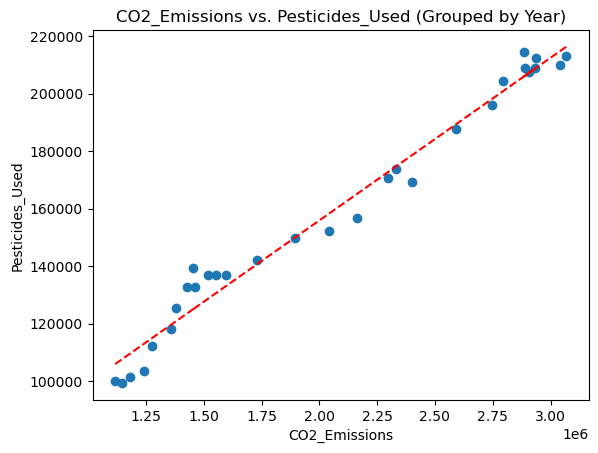

The correlation coefficient between CO2_Emissions and Pesticides_Used is 0.99


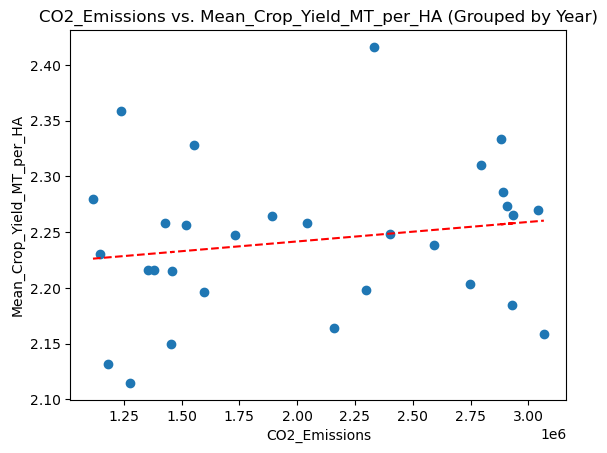

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.18


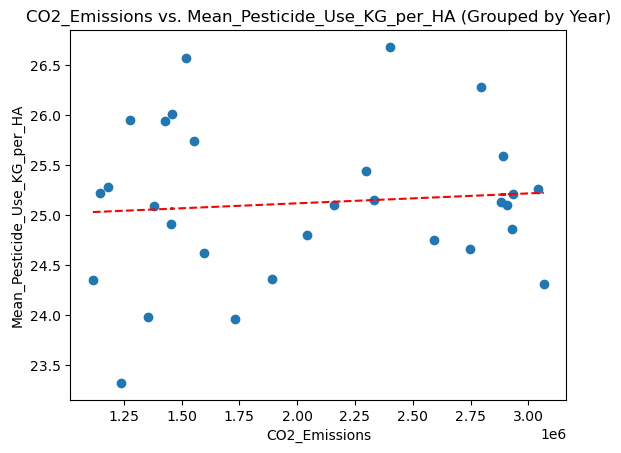

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is 0.09


In [28]:
# list to loop through
vars = ['Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation(merged_df, 'CO2_Emissions', var, 'mean')

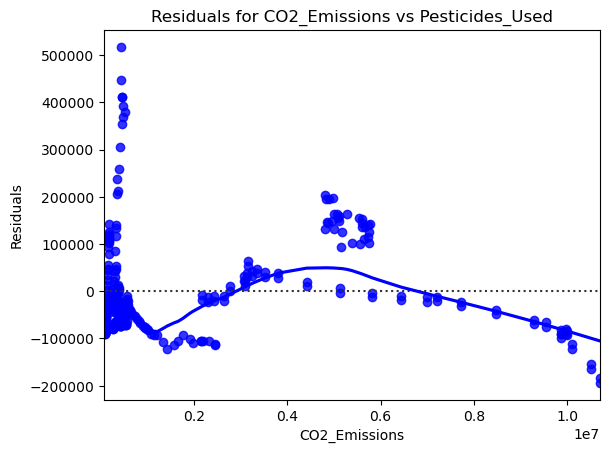

In [29]:
plot_residuals(merged_df, 'CO2_Emissions', 'Pesticides_Used')

#### The residual plot suggests that the linear regression model is not a good fit for the data.  This means that it may be biased or inefficient.  

### Q: Is there a correlation between CO2 and pesticides used or crop yield? 
### A: There is a correlation between CO2 and pesticide used.  What could be the reasons?  Clean this data further by removing the outliers and see if there is a pattern.   
### We do not observe a correlation between CO2 emissions and crop yield.  

In [30]:
merged_df

,Country,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,1.003200e+05,26156.00,32755907,2.400480,26.308400
1,Argentina,1991,1.059200e+05,26156.00,33230292,2.089216,28.136486
2,Argentina,1992,1.079300e+05,26156.00,33693532,2.192125,29.538750
3,Argentina,1993,1.102600e+05,26156.00,34152718,2.147947,25.887368
4,Argentina,1994,1.119100e+05,30195.00,34613491,1.815600,23.214000
...,...,...,...,...,...,...,...
295,United States,2015,4.990710e+06,423474.94,326126498,2.395477,25.690227
296,United States,2016,4.894500e+06,451666.84,329179421,2.374840,25.404800
297,United States,2017,4.819370e+06,449713.06,332204656,2.320947,26.632105
298,United States,2018,4.975310e+06,457385.40,335056495,2.219276,25.174138


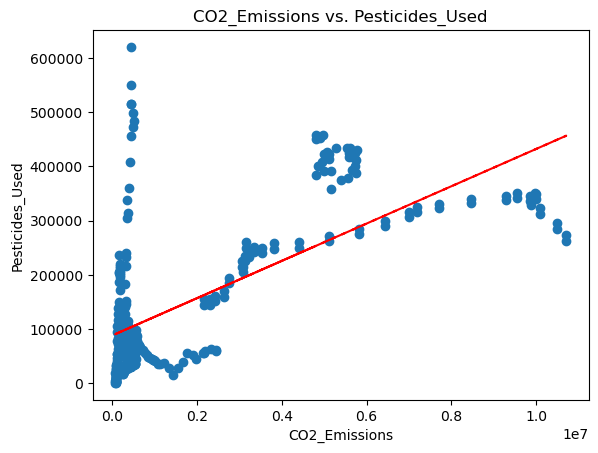

The correlation coefficient between CO2_Emissions and Pesticides_Used is 0.67


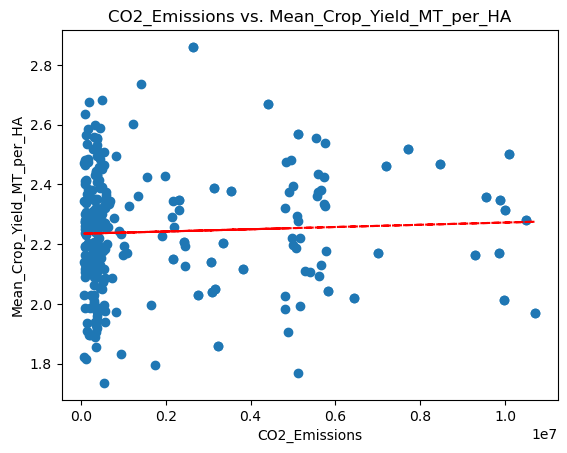

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.05


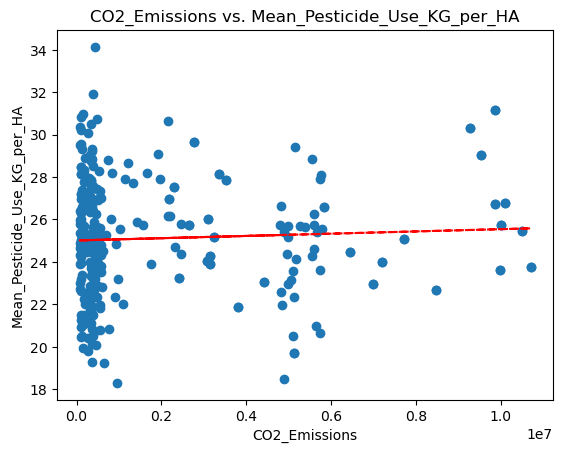

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is 0.05


In [31]:
# list to loop through
vars = ['Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation_two(merged_df, 'CO2_Emissions', var)

### Clean data for outliers

In [32]:
# Calculate the Z-scores for each column
merged_df['CO2_Z'] = stats.zscore(merged_df['CO2_Emissions'])
merged_df['Pesticides_Z'] = stats.zscore(merged_df['Pesticides_Used'])

# Filter the data, keeping only rows where Z-scores are less than 3 in absolute value
merged_df_no_outliers = merged_df[(merged_df['CO2_Z'].abs() < 3) & (merged_df['Pesticides_Z'].abs() < 3)]

# Drop the Z-score columns as they were just for filtering
merged_df_no_outliers = merged_df_no_outliers.drop(['CO2_Z', 'Pesticides_Z'], axis=1)

merged_df_no_outliers

,Country,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA
0,Argentina,1990,1.003200e+05,26156.00,32755907,2.400480,26.308400
1,Argentina,1991,1.059200e+05,26156.00,33230292,2.089216,28.136486
2,Argentina,1992,1.079300e+05,26156.00,33693532,2.192125,29.538750
3,Argentina,1993,1.102600e+05,26156.00,34152718,2.147947,25.887368
4,Argentina,1994,1.119100e+05,30195.00,34613491,1.815600,23.214000
...,...,...,...,...,...,...,...
295,United States,2015,4.990710e+06,423474.94,326126498,2.395477,25.690227
296,United States,2016,4.894500e+06,451666.84,329179421,2.374840,25.404800
297,United States,2017,4.819370e+06,449713.06,332204656,2.320947,26.632105
298,United States,2018,4.975310e+06,457385.40,335056495,2.219276,25.174138


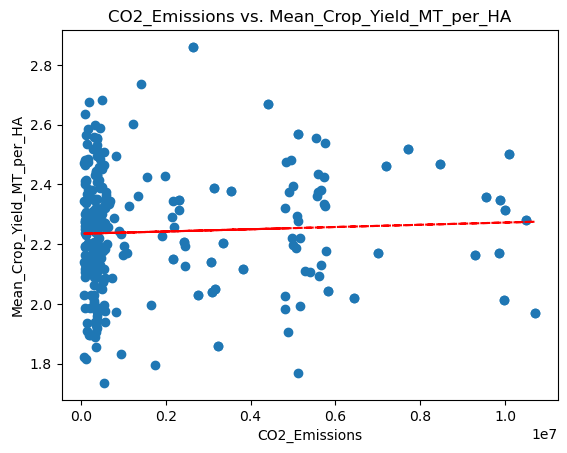

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.05


In [48]:
plot_correlation_two(merged_df, 'CO2_Emissions', 'Mean_Crop_Yield_MT_per_HA')

# Add to dashboard

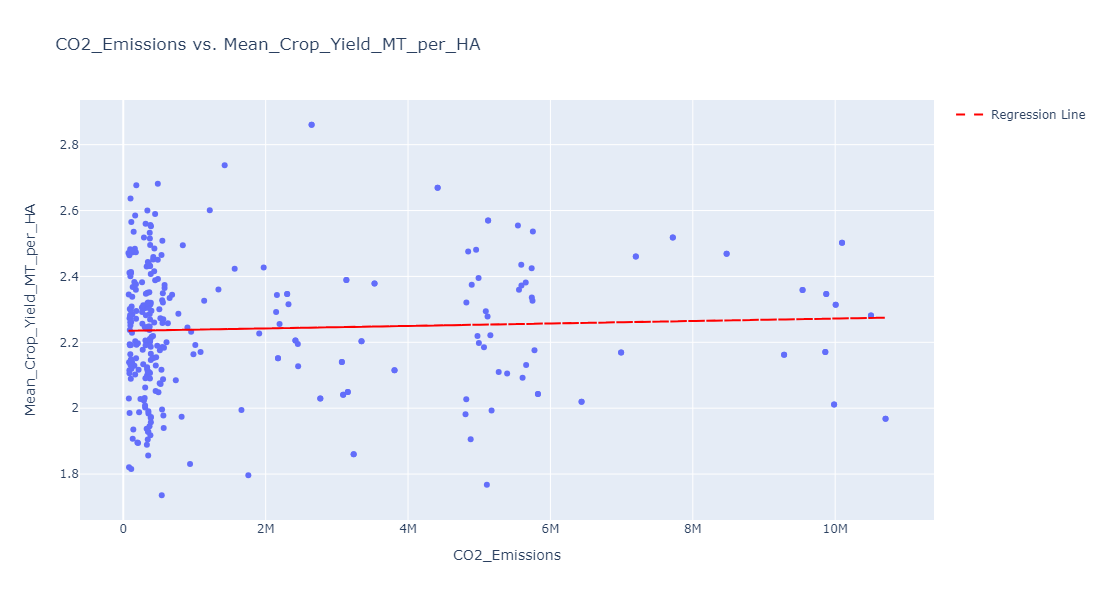

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.05


In [62]:
# import plotly.express as px
# import pandas as pd
# from scipy.stats import linregress, pearsonr

def plot_correlation_interactive(df, x_label, y_label, country_label, year_label, width=800, height=600):
    # Get x and y data
    x = df[x_label]
    y = df[y_label]
    country = df[country_label]
    year = df[year_label]

    # Perform linear regression
    slope, intercept, r, p, std_err = linregress(x, y)
    line = slope * x + intercept

    # Create a DataFrame for the scatter plot
    plot_data = pd.DataFrame({
        x_label: x,
        y_label: y,
        'Country': country,
        'Year': year,
        'Regression Line': line
    })

    # Create the scatter plot with Plotly
    fig = px.scatter(plot_data, x=x_label, y=y_label, title=f"{x_label} vs. {y_label}", 
                     width=width, height=height)

    # Add the regression line
    fig.add_scatter(x=plot_data[x_label], y=plot_data['Regression Line'], mode='lines', name='Regression Line', line=dict(color='red', dash='dash'))

    # Update layout for hover information to show country name and year only on hover
    fig.update_traces(
        hovertemplate='Country: %{text}<br>' +
                      f'Year: %{{customdata}}<br>' +
                      f'{x_label}: %{{x}}<br>' +
                      f'{y_label}: %{{y}}<extra></extra>',
        text=country,
        customdata=year  # Pass the year data to customdata
    )

    # Show the plot
    fig.show()

    # Print the Pearson correlation coefficient
    correlation_coefficient = round(pearsonr(x, y)[0], 2)
    print(f"The correlation coefficient between {x_label} and {y_label} is {correlation_coefficient}")

# call function
plot_correlation_interactive(merged_df, 'CO2_Emissions', 'Mean_Crop_Yield_MT_per_HA', 'Country', 'Year')

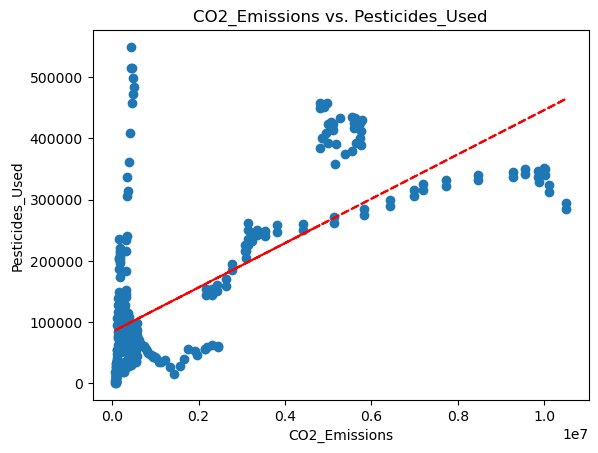

The correlation coefficient between CO2_Emissions and Pesticides_Used is 0.7


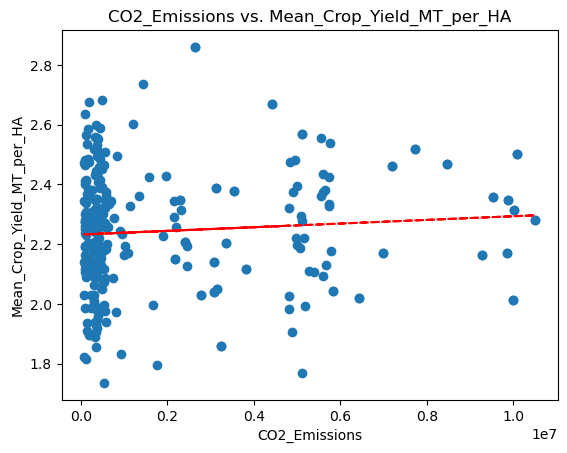

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.08


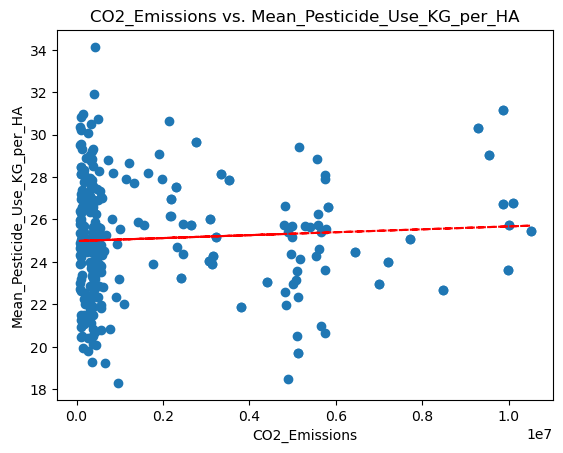

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is 0.07


In [34]:
# list to loop through
vars = ['Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation_two(merged_df_no_outliers, 'CO2_Emissions', var)

### Agricultural Variables vs. Crop Yield

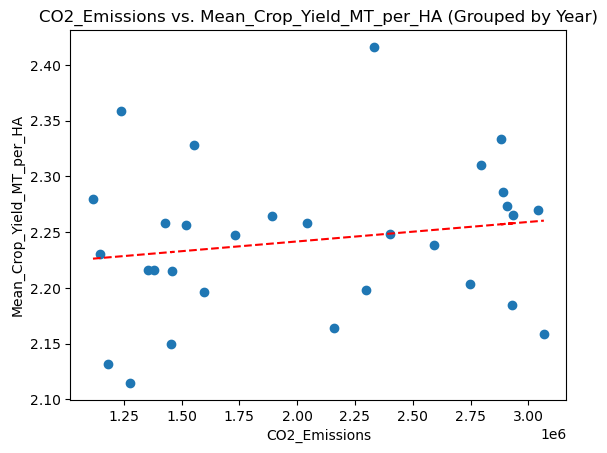

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.18


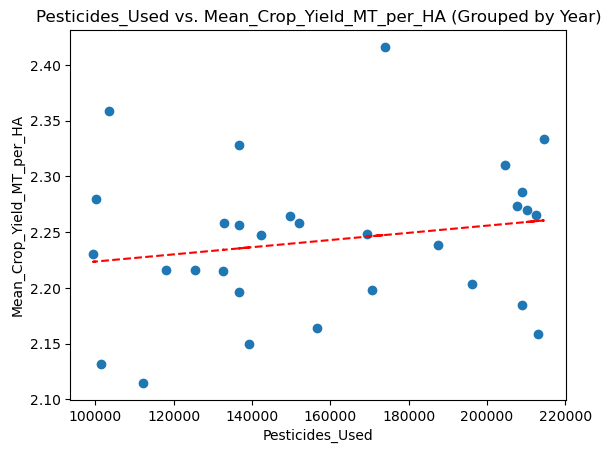

The correlation coefficient between Pesticides_Used and Mean_Crop_Yield_MT_per_HA is 0.19


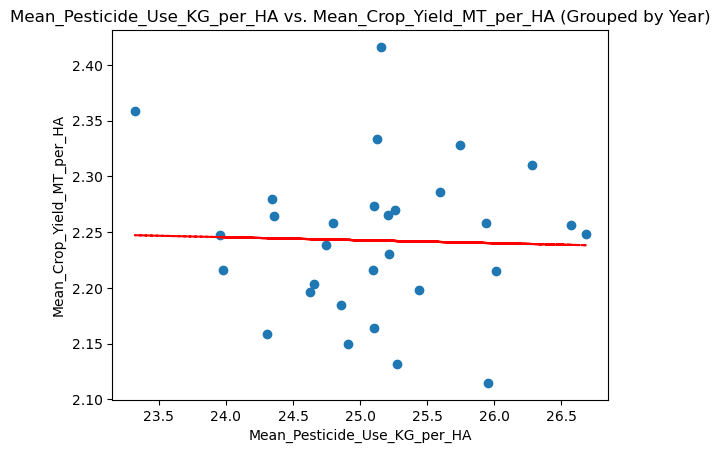

The correlation coefficient between Mean_Pesticide_Use_KG_per_HA and Mean_Crop_Yield_MT_per_HA is -0.03


In [35]:
# list to loop through
vars = ['CO2_Emissions', 'Pesticides_Used', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation(merged_df, var, 'Mean_Crop_Yield_MT_per_HA', 'mean')

#### Agricultural Variables over Time

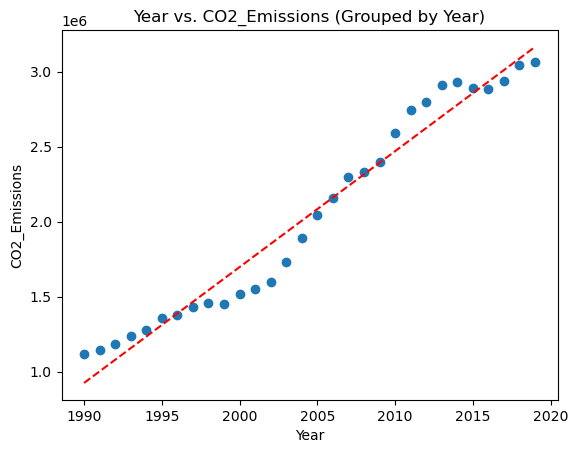

The correlation coefficient between Year and CO2_Emissions is 0.98


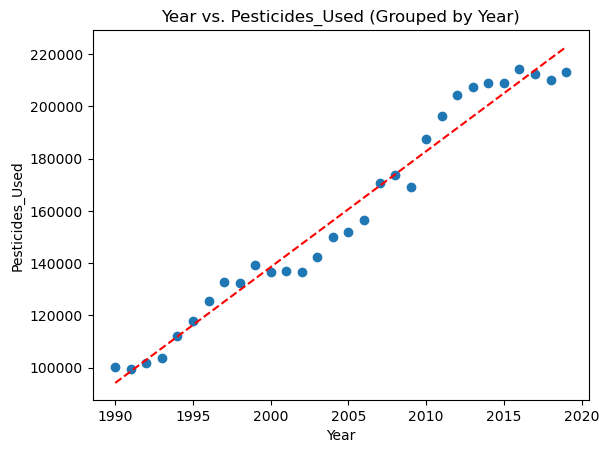

The correlation coefficient between Year and Pesticides_Used is 0.99


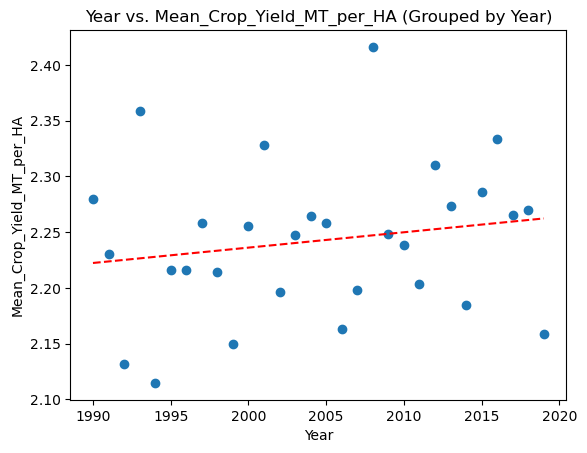

The correlation coefficient between Year and Mean_Crop_Yield_MT_per_HA is 0.18


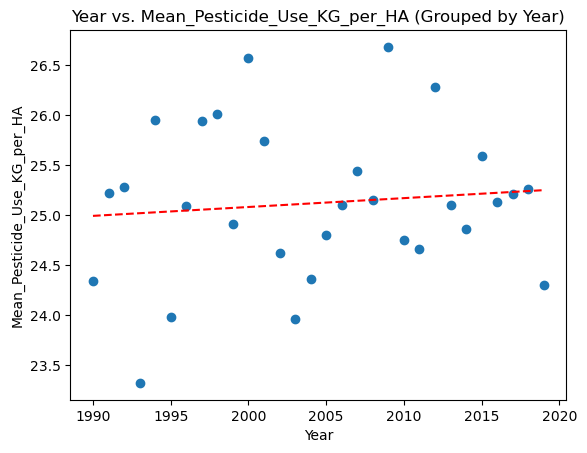

The correlation coefficient between Year and Mean_Pesticide_Use_KG_per_HA is 0.1


In [36]:
# list to loop through
vars = ['CO2_Emissions', 'Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation(merged_df, 'Year', var, 'mean')

In [37]:
def summary_stats(df, var):
    sum_stats = df.groupby('Country')[var].agg([
        ('Mean', np.mean),
        ('Median', np.median),
        ('Variance', np.var),
        ('Std Dev', np.std),
        ('SEM', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))])
    sum_stats = sum_stats.sort_values(by='Mean', ascending=False)
    return sum_stats

### Q: What do these summary statistics mean?

In [38]:
summary_stats(merged_df, 'Mean_Crop_Yield_MT_per_HA') 

C:\Users\jenni\AppData\Local\Temp\ipykernel_16752\2802212799.py:2: FutureWarning: The provided callable <function mean at 0x000001EDB9CD6B00> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sum_stats = df.groupby('Country')[var].agg([
C:\Users\jenni\AppData\Local\Temp\ipykernel_16752\2802212799.py:2: FutureWarning: The provided callable <function median at 0x000001EDBAED1510> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  sum_stats = df.groupby('Country')[var].agg([
C:\Users\jenni\AppData\Local\Temp\ipykernel_16752\2802212799.py:2: FutureWarning: The provided callable <function var at 0x000001EDB9CD6D40> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current b

,Mean,Median,Variance,Std Dev,SEM
Country,,,,,
Argentina,2.280418,2.289733,0.041679,0.204154,0.037273
China,2.260184,2.204274,0.051840,0.227684,0.029394
Nigeria,2.256496,2.261194,0.029442,0.171587,0.031327
United States,2.248684,2.286275,0.037223,0.192932,0.035224
Canada,2.241143,2.264046,0.032749,0.180968,0.033040
India,2.240355,2.250300,0.041093,0.202715,0.037011
Australia,2.230198,2.232815,0.032980,0.181603,0.033156
Brazil,2.206510,2.210970,0.051522,0.226985,0.041442
France,2.199313,2.205932,0.033303,0.182490,0.033318


### USA

In [39]:
usa_df = merged_df[merged_df['Country'] == 'United States']
usa_df = usa_df.reset_index(drop=True)
usa_df

,Country,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA,CO2_Z,Pesticides_Z
0,United States,1990,4.844520e+06,400975.94,253373385,2.475933,21.961333,0.988021,1.669806
1,United States,1991,4.807500e+06,384646.38,256471425,1.981250,25.719062,0.974955,1.557373
2,United States,1992,4.879630e+06,400975.90,259606020,1.905750,18.498000,1.000413,1.669806
3,United States,1993,4.995210e+06,391903.88,262633235,2.198161,22.942581,1.041207,1.607342
4,United States,1994,5.066810e+06,425922.70,265474811,2.185275,23.130750,1.066479,1.841571
5,United States,1995,5.117040e+06,423201.53,268205794,2.278190,22.363810,1.084207,1.822835
6,United States,1996,5.273490e+06,433180.38,270860696,2.109840,25.670800,1.139426,1.891542
7,United States,1997,5.543350e+06,434540.75,273468014,2.554515,24.288788,1.234673,1.900908
8,United States,1998,5.590540e+06,424562.12,276119323,2.435517,26.267241,1.251329,1.832203
9,United States,1999,5.609020e+06,433633.97,278785482,2.092125,24.627813,1.257851,1.894665


In [40]:
usa_stats = usa_df.describe()
usa_stats

,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA,CO2_Z,Pesticides_Z
count,30.000000,3.000000e+01,30.00000,3.000000e+01,30.000000,30.000000,30.000000,30.000000
mean,2004.500000,5.277263e+06,413953.55700,2.951897e+08,2.248684,24.514380,1.140758,1.759160
std,8.803408,3.487067e+05,24832.98451,2.558500e+07,0.192932,2.531280,0.123076,0.170981
min,1990.000000,4.807500e+06,358337.70000,2.533734e+08,1.767810,18.498000,0.974955,1.376231
25%,1997.250000,4.979160e+06,394625.03500,2.741308e+08,2.115138,22.989623,1.035542,1.626078
50%,2004.500000,5.165015e+06,417304.64000,2.942515e+08,2.286275,24.900975,1.101140,1.782233
75%,2011.750000,5.605022e+06,428984.59000,3.163628e+08,2.380029,25.711854,1.256441,1.862652
max,2019.000000,5.775810e+06,457385.40000,3.377901e+08,2.554515,29.421290,1.316720,2.058199


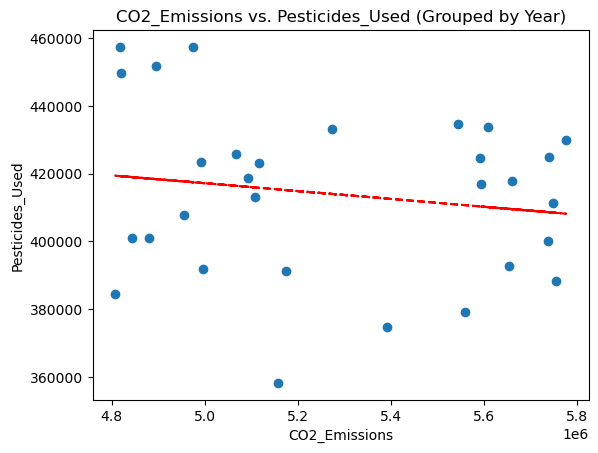

The correlation coefficient between CO2_Emissions and Pesticides_Used is -0.16


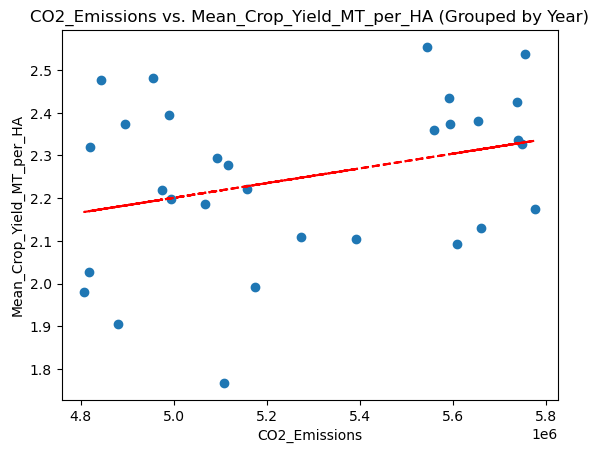

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.31


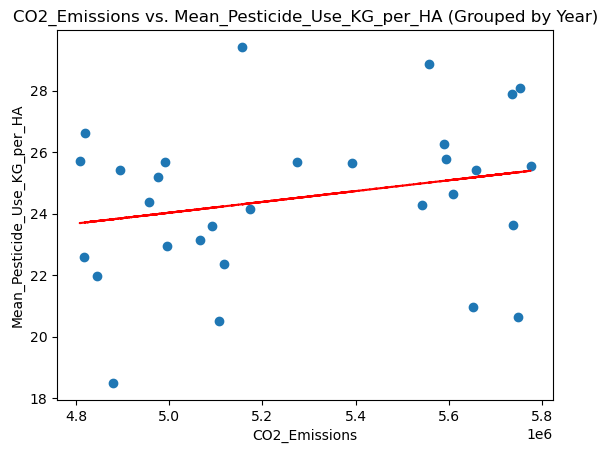

The correlation coefficient between CO2_Emissions and Mean_Pesticide_Use_KG_per_HA is 0.24


In [41]:
# list to loop through
vars = ['Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation(usa_df, 'CO2_Emissions', var, 'mean')

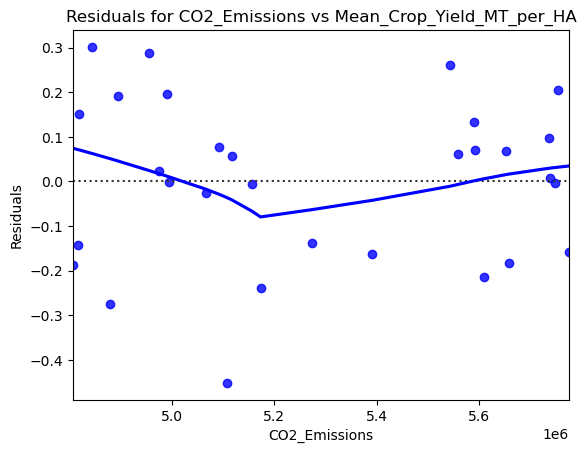

In [42]:
plot_residuals(usa_df, 'CO2_Emissions', 'Mean_Crop_Yield_MT_per_HA')

C:\Users\jenni\anaconda3\envs\dev3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


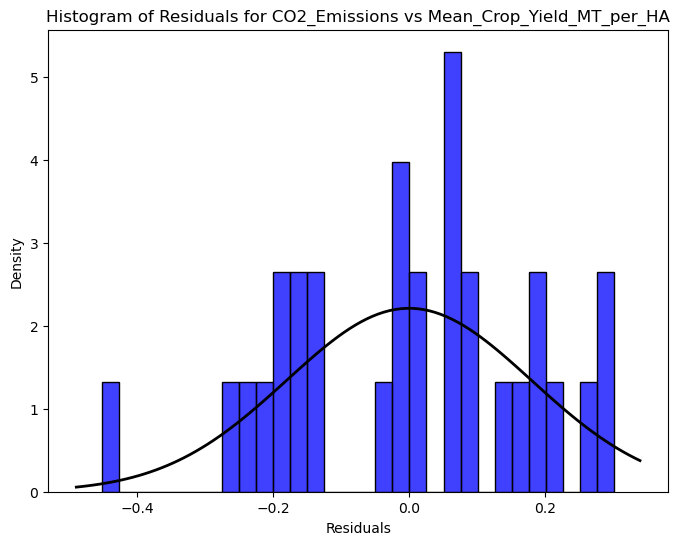

In [43]:
plot_residuals_histogram(usa_df, 'CO2_Emissions', 'Mean_Crop_Yield_MT_per_HA')

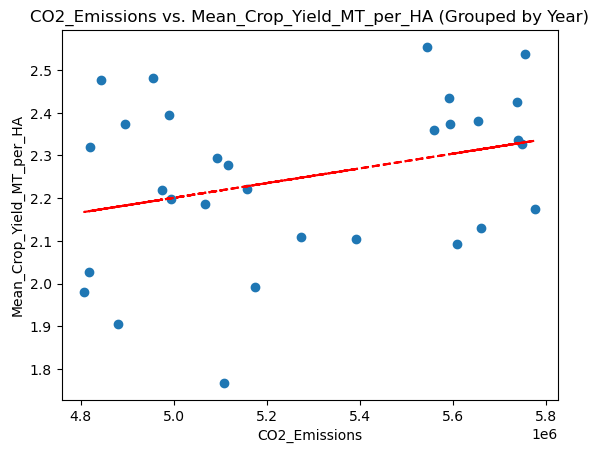

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.31


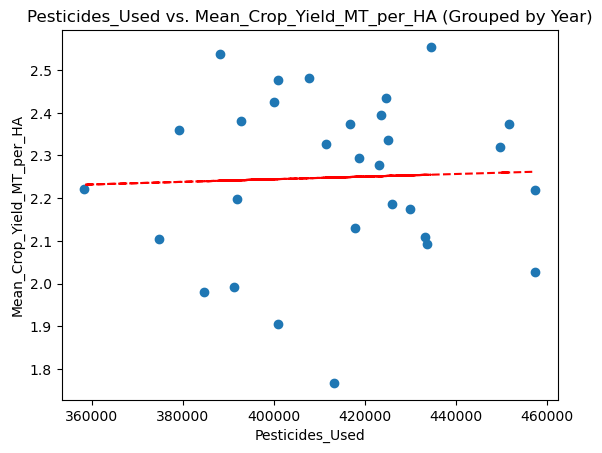

The correlation coefficient between Pesticides_Used and Mean_Crop_Yield_MT_per_HA is 0.04


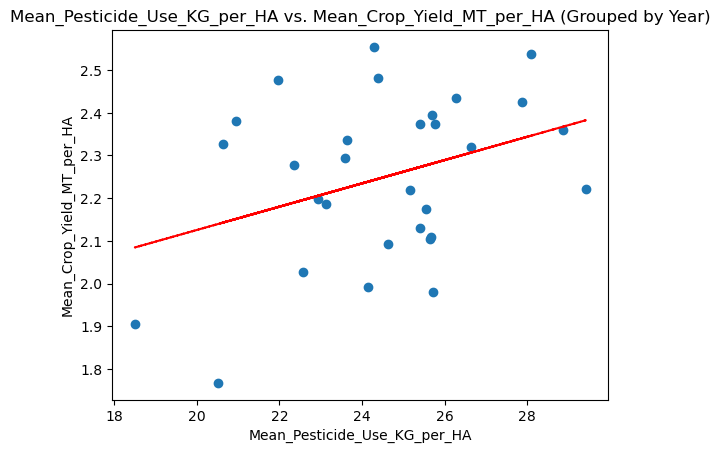

The correlation coefficient between Mean_Pesticide_Use_KG_per_HA and Mean_Crop_Yield_MT_per_HA is 0.36


In [44]:
# list to loop through
vars = ['CO2_Emissions', 'Pesticides_Used', 'Mean_Pesticide_Use_KG_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation(usa_df, var, 'Mean_Crop_Yield_MT_per_HA', 'mean')

### China

In [45]:
china_df = merged_df[merged_df['Country'] == 'China']
china_df = china_df.groupby(['Country','Year']).mean().reset_index()
china_df.head()

,Country,Year,CO2_Emissions,Pesticides_Used,Population,Mean_Crop_Yield_MT_per_HA,Mean_Pesticide_Use_KG_per_HA,CO2_Z,Pesticides_Z
0,China,1990,2173360.0,149543.025,1.153583e+09,2.151258,26.986774,0.045236,-0.061373
1,China,1991,2302180.0,149530.220,1.170789e+09,2.346694,27.549167,0.090703,-0.061461
2,China,1992,2418180.0,155923.215,1.184574e+09,2.205400,23.247200,0.131645,-0.017444
3,China,1993,2645410.0,164524.650,1.197309e+09,2.860440,25.725600,0.211846,0.041779
4,China,1994,2767670.0,189783.845,1.209003e+09,2.029156,29.645937,0.254997,0.215695


In [46]:
china_df.dtypes

Country                          object
Year                              int64
CO2_Emissions                   float64
Pesticides_Used                 float64
Population                      float64
Mean_Crop_Yield_MT_per_HA       float64
Mean_Pesticide_Use_KG_per_HA    float64
CO2_Z                           float64
Pesticides_Z                    float64
dtype: object

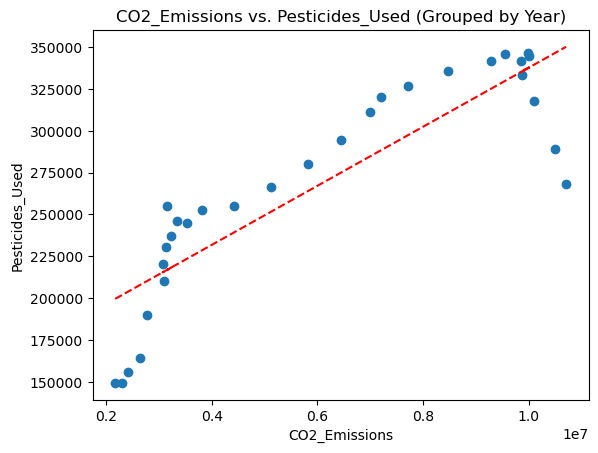

The correlation coefficient between CO2_Emissions and Pesticides_Used is 0.87


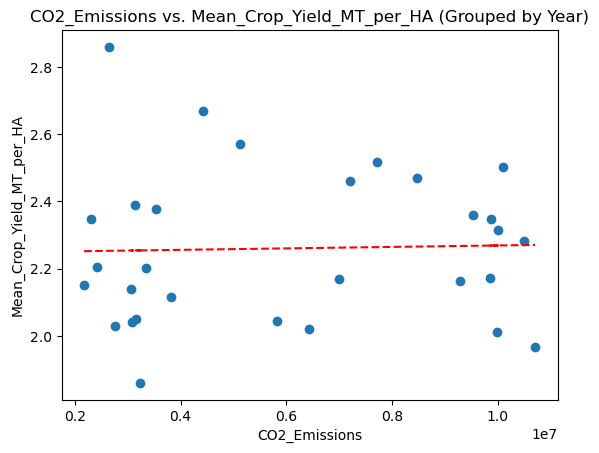

The correlation coefficient between CO2_Emissions and Mean_Crop_Yield_MT_per_HA is 0.03


In [47]:
# list to loop through
vars = ['Pesticides_Used', 'Mean_Crop_Yield_MT_per_HA']

# Loop through list to investigate the correlation between CO2 emissions and other variables
for var in vars:
    plot_correlation(china_df, 'CO2_Emissions', var, 'mean')